# WeatherPy
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
lat = []
lng = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500) 
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500) 
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
cities_df = pd.DataFrame({'cities':cities})
# Print the city count to confirm sufficient count
print(len(cities))

610


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" #Fahrenheit

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
cities_list = []
lat = []
lng = []
temp_max = []
humidity = []
cloudiness = []
wind_speed = []
country=[]
date = []

In [4]:
record=0

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        cities_list.append(city)
        record += 1
        print(f"Processing Record {record} for city = {city}")
        time.sleep(1)
    except KeyError:
        print("City not found...skipping record")

Processing Record 1 for city = thompson
City not found...skipping record
Processing Record 2 for city = lucera
Processing Record 3 for city = bengkulu
Processing Record 4 for city = punta arenas
Processing Record 5 for city = rikitea
Processing Record 6 for city = xichang
Processing Record 7 for city = tuktoyaktuk
Processing Record 8 for city = vaini
Processing Record 9 for city = ekibastuz
Processing Record 10 for city = puerto escondido
Processing Record 11 for city = khatanga
Processing Record 12 for city = kodiak
Processing Record 13 for city = ashcroft
City not found...skipping record
Processing Record 14 for city = carnarvon
Processing Record 15 for city = atocha
Processing Record 16 for city = severo-kurilsk
Processing Record 17 for city = ushuaia
Processing Record 18 for city = barrow
Processing Record 19 for city = yellowknife
Processing Record 20 for city = drayton valley
Processing Record 21 for city = srednekolymsk
Processing Record 22 for city = mahebourg
Processing Record

Processing Record 187 for city = conceicao do araguaia
Processing Record 188 for city = lethem
Processing Record 189 for city = grand gaube
City not found...skipping record
Processing Record 190 for city = clyde river
Processing Record 191 for city = tupelo
Processing Record 192 for city = salinopolis
Processing Record 193 for city = novobureyskiy
Processing Record 194 for city = cabo san lucas
Processing Record 195 for city = kilindoni
Processing Record 196 for city = kaeo
Processing Record 197 for city = kungurtug
Processing Record 198 for city = kayerkan
Processing Record 199 for city = narsaq
Processing Record 200 for city = manavalakurichi
Processing Record 201 for city = urumqi
Processing Record 202 for city = saskylakh
Processing Record 203 for city = fortuna
Processing Record 204 for city = ilulissat
Processing Record 205 for city = hasaki
Processing Record 206 for city = blagoveshchensk
Processing Record 207 for city = phibun mangsahan
Processing Record 208 for city = cardinal

Processing Record 370 for city = coihaique
Processing Record 371 for city = tim
Processing Record 372 for city = salekhard
Processing Record 373 for city = verkhnyaya inta
Processing Record 374 for city = schruns
Processing Record 375 for city = tomatlan
Processing Record 376 for city = yarada
Processing Record 377 for city = rawson
City not found...skipping record
Processing Record 378 for city = safford
Processing Record 379 for city = buarcos
Processing Record 380 for city = tacuarembo
Processing Record 381 for city = richards bay
Processing Record 382 for city = mount darwin
Processing Record 383 for city = tual
Processing Record 384 for city = rapid valley
Processing Record 385 for city = inongo
Processing Record 386 for city = athabasca
Processing Record 387 for city = valreas
Processing Record 388 for city = port hawkesbury
Processing Record 389 for city = port macquarie
Processing Record 390 for city = sovetskiy
Processing Record 391 for city = rafai
Processing Record 392 for c

Processing Record 551 for city = thessalon
Processing Record 552 for city = iranshahr
Processing Record 553 for city = houston
Processing Record 554 for city = savelugu
Processing Record 555 for city = osakarovka
Processing Record 556 for city = iskateley
Processing Record 557 for city = araguaina
Processing Record 558 for city = virginia beach
Processing Record 559 for city = chapais
Processing Record 560 for city = union city
Processing Record 561 for city = coronado
City not found...skipping record
Processing Record 562 for city = joutseno


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {
    "City": cities_list,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}

weather_data_df = pd.DataFrame(weather_dict)

weather_data_df.to_csv(r'weather_data.csv',index=False)
len(weather_data_df)

562

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
humidity_value = 100
weather_data_df.index[weather_data_df["Humidity"] > humidity_value]

Int64Index([], dtype='int64')

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
weather_data_humidity_df = weather_data_df[weather_data_df["Humidity"] > humidity_value]
clean_city_df = weather_data_df.drop(weather_data_humidity_df.index, inplace=False)
print(len(weather_data_humidity_df))
clean_city_df

0


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,thompson,55.74,-97.86,-2.20,84,40,3.36,CA,1607659730
1,lucera,41.51,15.34,44.60,81,75,4.70,IT,1607659926
2,bengkulu,-3.80,102.27,82.69,70,89,12.10,ID,1607659928
3,punta arenas,-53.15,-70.92,44.60,81,0,5.82,CL,1607659929
4,rikitea,-23.12,-134.97,77.22,79,60,14.23,PF,1607659930
...,...,...,...,...,...,...,...,...,...
557,virginia beach,36.85,-75.98,41.00,71,75,5.93,US,1607660551
558,chapais,49.78,-74.85,23.00,100,90,6.93,CA,1607660342
559,union city,37.60,-122.02,51.80,71,1,3.36,US,1607660553
560,coronado,32.69,-117.18,59.00,62,90,4.70,US,1607660283


In [8]:
#Prep to plot data
date_of_analysis = clean_city_df.iloc[0,8]
date_of_analysis = datetime.utcfromtimestamp(date_of_analysis).strftime('%m/%d/%y')
date_of_analysis

'12/11/20'

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

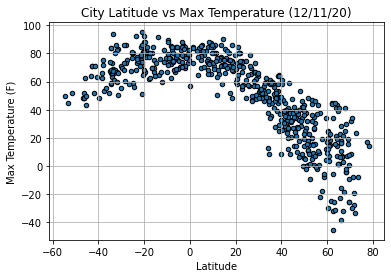

<Figure size 432x288 with 0 Axes>

In [9]:
clean_city_df.plot(kind="scatter", y='Max Temp', x='Lat', grid=True, edgecolor='black',
               title=f"City Latitude vs Max Temperature ({date_of_analysis})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()
plt.savefig('Lat_vs_Temp.png')

#### Anlysis of Latitude vs Max Temp:
>- Max temp drops as cities are further away from the center Latitude (0).  This indicates it gets colder the further away from the equator, especially in the positive Latitude values.  

## Latitude vs. Humidity Plot

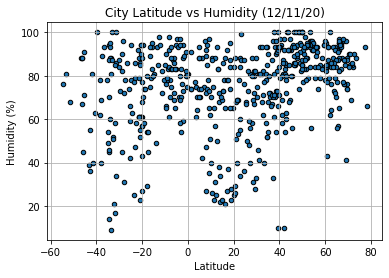

<Figure size 432x288 with 0 Axes>

In [10]:
clean_city_df.plot(kind="scatter", y='Humidity', x='Lat', grid=True, edgecolor='black',
               title=f"City Latitude vs Humidity ({date_of_analysis})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()
plt.savefig('Lat_vs_Humidity.png')

#### Anlysis of Latitude vs Humidity:
>- Countries above 40 Latitude have a concentrated amount of cities with high humidity %s (above 60%).

## Latitude vs. Cloudiness Plot

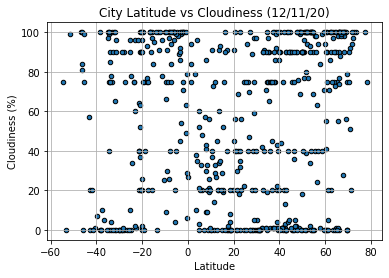

<Figure size 432x288 with 0 Axes>

In [11]:
clean_city_df.plot(kind="scatter", y='Cloudiness', x='Lat', grid=True, edgecolor='black',
               title=f"City Latitude vs Cloudiness ({date_of_analysis})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()
plt.savefig('Lat_vs_cloudiness.png')

#### Anlysis of Latitude vs Cloudiness:
>- There is no coorelation in the location of a city's Latitidue and wind speed.

## Latitude vs. Wind Speed Plot

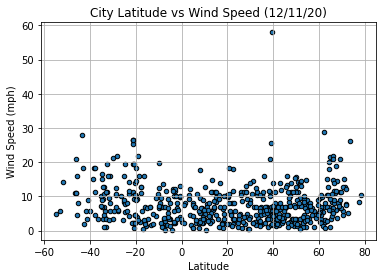

<Figure size 432x288 with 0 Axes>

In [12]:
clean_city_df.plot(kind="scatter", y='Wind Speed', x='Lat', grid=True, edgecolor='black',
               title=f"City Latitude vs Wind Speed ({date_of_analysis})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()
plt.savefig('Lat_vs_WindSpeed.png')

#### Anlysis of Latitude vs Wind Speed:
>- There is no coorelation in the location of a city's Latitidue and wind speed.

## Linear Regression

In [13]:
#create new df & prep for plotting below
bins = [-90,0,90]
hemisphere_range = ["Southern","Northern"]
clean_city_df["Hemisphere"] = pd.cut(clean_city_df["Lat"], bins,labels=hemisphere_range)
clean_city_north_df = clean_city_df.loc[clean_city_df["Hemisphere"] == "Northern"]
clean_city_south_df = clean_city_df.loc[clean_city_df["Hemisphere"] == "Southern"]
#check that bin & cut captured all records between hemispheres
print(len(clean_city_south_df)+len(clean_city_north_df)-len(clean_city_df))

0


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8580415780041751


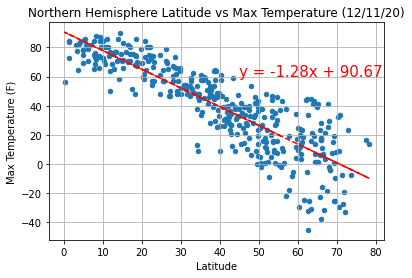

<Figure size 432x288 with 0 Axes>

In [14]:
nt_lat = clean_city_north_df['Lat']
nt_maxtemp = clean_city_north_df['Max Temp']

nt_slope, nt_int, nt_r, nt_p, nt_std_err = linregress(nt_lat,nt_maxtemp)
nt_fit = nt_slope * nt_lat + nt_int

clean_city_north_df.plot(kind="scatter", y='Max Temp', x='Lat', grid=True,
               title=f"Northern Hemisphere Latitude vs Max Temperature ({date_of_analysis})")

plt.plot(nt_lat,nt_fit,"--",color="red")
line_eq_nt = "y = " + str(round(nt_slope,2)) + "x + " + str(round(nt_int,2))
plt.annotate(line_eq_nt,(45,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-value is: {nt_r}")
plt.show()
plt.savefig('Northern_Hemishpere_Lat_vs_Temp.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5395827259141959


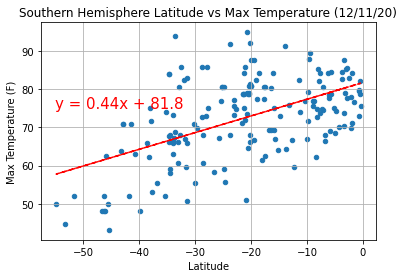

<Figure size 432x288 with 0 Axes>

In [15]:
st_slope, st_int, st_r, st_p, st_std_err = linregress(clean_city_south_df['Lat'],clean_city_south_df['Max Temp'])
st_fit = st_slope * clean_city_south_df['Lat'] + st_int

clean_city_south_df.plot(kind="scatter", y='Max Temp', x='Lat', grid=True,
               title=f"Southern Hemisphere Latitude vs Max Temperature ({date_of_analysis})")

plt.plot(clean_city_south_df['Lat'],st_fit,"--",color="red")
line_eq_st = "y = " + str(round(st_slope,2)) + "x + " + str(round(st_int,2))
plt.annotate(line_eq_st,(-55,75),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-value is: {st_r}")
plt.show()
plt.savefig('Southern_Hemishpere_Lat_vs_Temp.png')

#### Northern Hemisphere & Southern Hemisphere Lat vs Max Temp
>- Northern Hemisphere has more cities than the Southern Hemisphere.  
>- Northern Hemisphere has a stronger negative coorelation of tempurature dropping as Latitude increases (head further North) compared to temp drops as latitude drops (head south).

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.4047831747868285


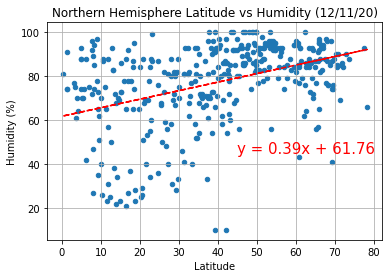

<Figure size 432x288 with 0 Axes>

In [16]:
nh_slope, nh_int, nh_r, nh_p, nh_std_err = linregress(clean_city_north_df['Lat'],clean_city_north_df['Humidity'])
nh_fit = nh_slope * clean_city_north_df['Lat'] + nh_int

clean_city_north_df.plot(kind="scatter", y='Humidity', x='Lat', grid=True,
               title=f"Northern Hemisphere Latitude vs Humidity ({date_of_analysis})")

plt.plot(clean_city_north_df['Lat'],nh_fit,"--",color="red")
line_eq_nh = "y = " + str(round(nh_slope,2)) + "x + " + str(round(nh_int,2))
plt.annotate(line_eq_nh,(45,45),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {nh_r}")
plt.show()
plt.savefig('Northern_Hemishpere_Lat_vs_Humidity.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.23474942713170685


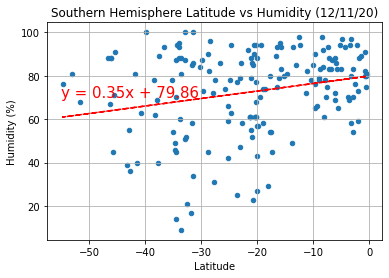

<Figure size 432x288 with 0 Axes>

In [17]:
sh_slope, sh_int, sh_r, sh_p, sh_std_err = linregress(clean_city_south_df['Lat'],clean_city_south_df['Humidity'])
sh_fit = sh_slope * clean_city_south_df['Lat'] + sh_int

clean_city_south_df.plot(kind="scatter", y='Humidity', x='Lat', grid=True,
               title=f"Southern Hemisphere Latitude vs Humidity ({date_of_analysis})")

plt.plot(clean_city_south_df['Lat'],sh_fit,"--",color="red")
line_eq_sh = "y = " + str(round(sh_slope,2)) + "x + " + str(round(sh_int,2))
plt.annotate(line_eq_sh,(-55,70),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {sh_r}")
plt.show()
plt.savefig('Southern_Hemishpere_Lat_vs_Humidity.png')

#### Northern Hemisphere & Southern Hemisphere Lat vs Humidity
>- Northern Hemisphere has a stronger negative coorelation of tempurature dropping as Latitude increases (head further North) compared to temp drops as latitude drops (head south).

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.3322060268752261


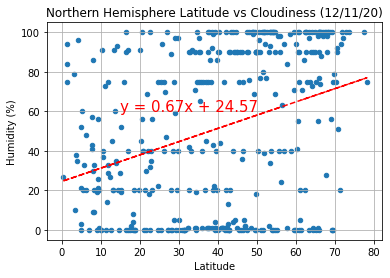

<Figure size 432x288 with 0 Axes>

In [18]:
nc_slope, nc_int, nc_r, nc_p, nc_std_err = linregress(clean_city_north_df['Lat'],clean_city_north_df['Cloudiness'])
nc_fit = nc_slope * clean_city_north_df['Lat'] + nc_int

clean_city_north_df.plot(kind="scatter", y='Cloudiness', x='Lat', grid=True,
               title=f"Northern Hemisphere Latitude vs Cloudiness ({date_of_analysis})")

plt.plot(clean_city_north_df['Lat'],nc_fit,"--",color="red")
line_eq_nc = "y = " + str(round(nc_slope,2)) + "x + " + str(round(nc_int,2))
plt.annotate(line_eq_nc,(15,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {nc_r}")
#print(f"The r-squared is: {nc_r**2}")
plt.show()
plt.savefig('Northern_Hemishpere_Lat_vs_Cloudiness.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.23474942713170685


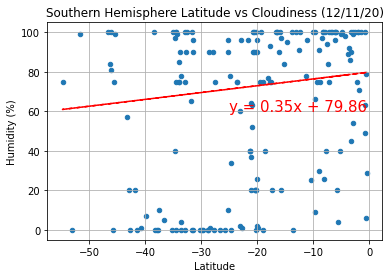

<Figure size 432x288 with 0 Axes>

In [19]:
sc_slope, sc_int, sc_r, sc_p, sc_std_err = linregress(clean_city_south_df['Lat'],clean_city_south_df['Humidity'])
sc_fit = sc_slope * clean_city_south_df['Lat'] + sc_int

clean_city_south_df.plot(kind="scatter", y='Cloudiness', x='Lat', grid=True,
               title=f"Southern Hemisphere Latitude vs Cloudiness ({date_of_analysis})")

plt.plot(clean_city_south_df['Lat'],sc_fit,"--",color="red")
line_eq_sc = "y = " + str(round(sc_slope,2)) + "x + " + str(round(sc_int,2))
plt.annotate(line_eq_sc,(-25,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {sc_r}")
plt.show()
plt.savefig('Southern_Hemishpere_Lat_vs_Cloudiness.png')

#### Northern Hemisphere & Southern Hemisphere Lat vs Cloudiness
>- Northern Hemisphere has a slightly positive coorelation to Latitude (greater chance a city is cloudier the further north from the equater a city is located)
>- There is still not a lot of coorelation in Latitude vs Wind Speed in Southern Hemisphere; still a large range of wind speeds across the Latitudes, causing a very low coorelation & flat regression line. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.17397399986800002


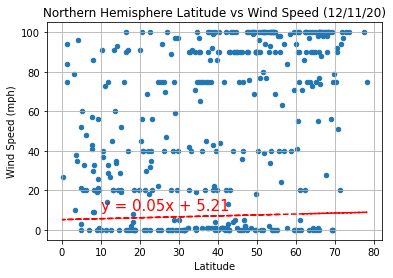

<Figure size 432x288 with 0 Axes>

In [20]:
nw_slope, nw_int, nw_r, nw_p, nw_std_err = linregress(clean_city_north_df['Lat'],clean_city_north_df['Wind Speed'])
nw_fit = nw_slope * clean_city_north_df['Lat'] + nw_int

clean_city_north_df.plot(kind="scatter", y='Cloudiness', x='Lat', grid=True,
               title=f"Northern Hemisphere Latitude vs Wind Speed ({date_of_analysis})")

plt.plot(clean_city_north_df['Lat'],nw_fit,"--",color="red")
line_eq_nw = "y = " + str(round(nw_slope,2)) + "x + " + str(round(nw_int,2))
plt.annotate(line_eq_nw,(10,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {nw_r}")
plt.show()
plt.savefig('Northern_Hemishpere_Lat_vs_WindSpeed.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.2417230755491449


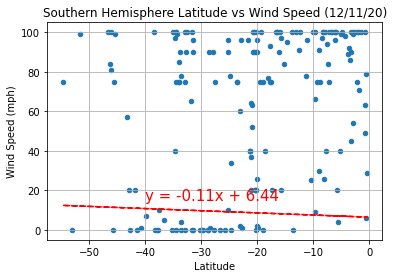

<Figure size 432x288 with 0 Axes>

In [26]:
sw_slope, sw_int, sw_r, sw_p, sw_std_err = linregress(clean_city_south_df['Lat'],clean_city_south_df['Wind Speed'])
sw_fit = sw_slope * clean_city_south_df['Lat'] + sw_int

clean_city_south_df.plot(kind="scatter", y='Cloudiness', x='Lat', grid=True,
               title=f"Southern Hemisphere Latitude vs Wind Speed ({date_of_analysis})")

plt.plot(clean_city_south_df['Lat'],sw_fit,"--",color="red")
line_eq_sw = "y = " + str(round(sw_slope,2)) + "x + " + str(round(sw_int,2))
plt.annotate(line_eq_sw,(-40,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {sw_r}")
plt.show()
plt.savefig('Southern_Hemishpere_Lat_vs_WindSpeed.png')

#### Northern Hemisphere & Southern Hemisphere Lat vs Wind Speed
>- There is still no coorelation in Latitude vs Wind Speed when broken down by Northern & Southern Hemisphere; still a large range of wind speeds across the Latitudes, causing a very low coorelation & flat regression line.